<a href="https://colab.research.google.com/github/ReVuz/Machine_Learning/blob/main/Dip_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Implement the image negative transformation function and apply it to a grayscale image.


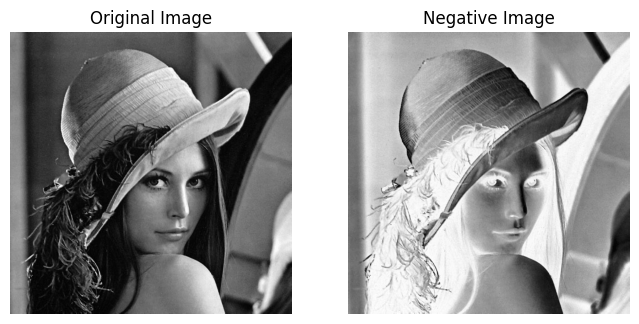

Analyze the effect of image negative on different types of images (e.g., low contrast, high contrast).


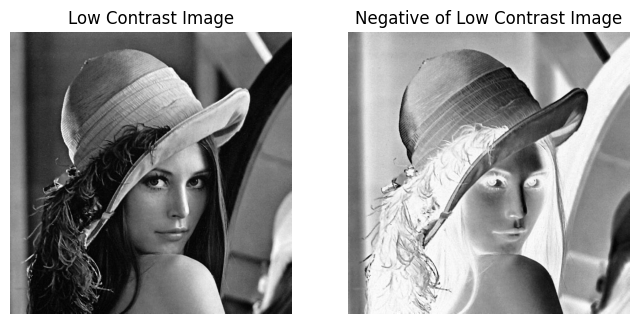

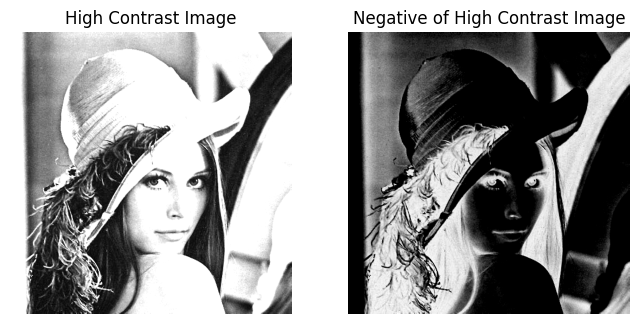

Compare the histogram of an original image with its negative. Explain the observed differences.


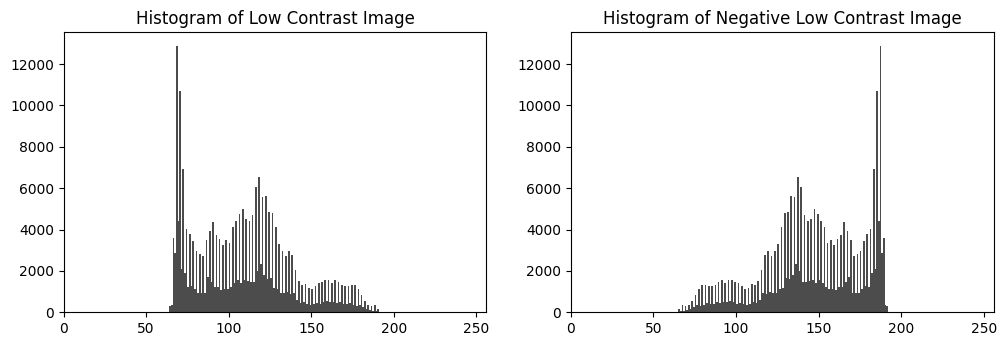

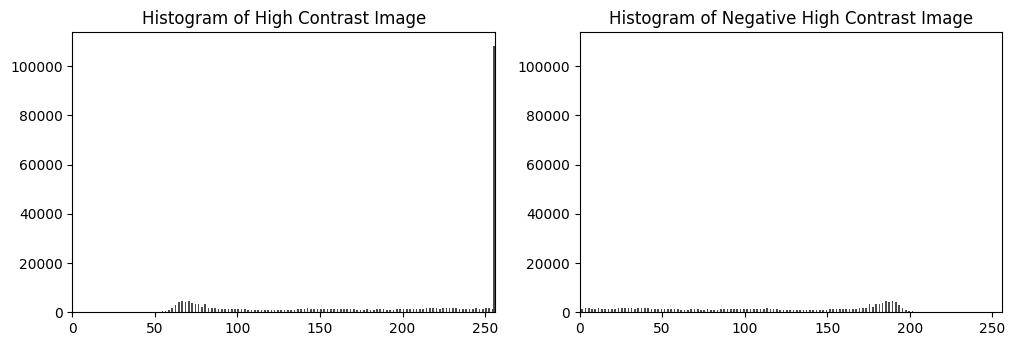

In [ ]:

def apply_negative(image):
  if len(image.shape) != 2:
    raise ValueError("Input image must be a grayscale image.")
  resultant = 255 - image
  return resultant

def apply_low_contrast(image, alpha=0.5):
  value = 128
  resultant = cv2.addWeighted(image, alpha, np.full_like(image, value), 1 - alpha, 0)
  return resultant

def apply_high_contrast(image, alpha=2.0, beta=50):
  resultant = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
  return resultant

def plot_histogram(image, title):
  plt.hist(image.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
  plt.title(title)
  plt.xlim([0, 256])


# Question 1
print("Implement the image negative transformation function and apply it to a grayscale image.")

image     = cv2.imread('lenaGrayscale.png', cv2.IMREAD_GRAYSCALE)
negative  = apply_negative(image)
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Negative Image')
plt.imshow(negative, cmap='gray')
plt.axis('off')
plt.show()

# Question 2
print("Analyze the effect of image negative on different types of images (e.g., low contrast, high contrast).")

lowContrast           = apply_low_contrast(image)
lowContrastNegative   = apply_negative(lowContrast)
highContrast          = apply_high_contrast(image)
highContrastNegative  = apply_negative(highContrast)
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.title('Low Contrast Image')
plt.imshow(lowContrast, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Negative of Low Contrast Image')
plt.imshow(lowContrastNegative, cmap='gray')
plt.axis('off')
plt.show()
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.title('High Contrast Image')
plt.imshow(highContrast, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Negative of High Contrast Image')
plt.imshow(highContrastNegative, cmap='gray')
plt.axis('off')
plt.show()

# Question 3
print("Compare the histogram of an original image with its negative. Explain the observed differences.")

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plot_histogram(lowContrast, 'Histogram of Low Contrast Image')
plt.subplot(2, 2, 2)
plot_histogram(lowContrastNegative, 'Histogram of Negative Low Contrast Image')
plt.show()
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 3)
plot_histogram(highContrast, 'Histogram of High Contrast Image')
plt.subplot(2, 2, 4)
plot_histogram(highContrastNegative, 'Histogram of Negative High Contrast Image')
plt.show()



Implement the log transformation function and apply it to an image with a narrow range of low gray-level values.


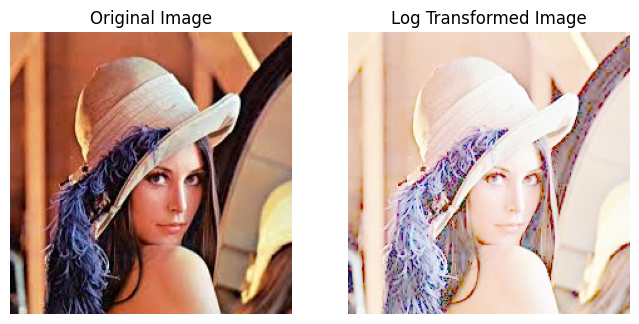

Analyze the effect of the log transformation on enhancing details in dark regions of an image.


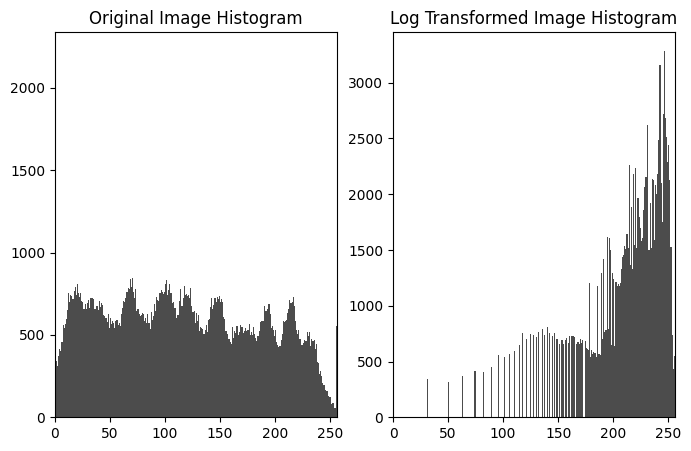

Experiment with different values of the constant 'c' in the log transformation equation and observe the changes in output image.


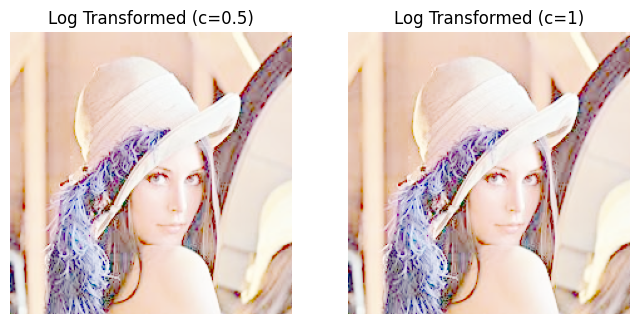

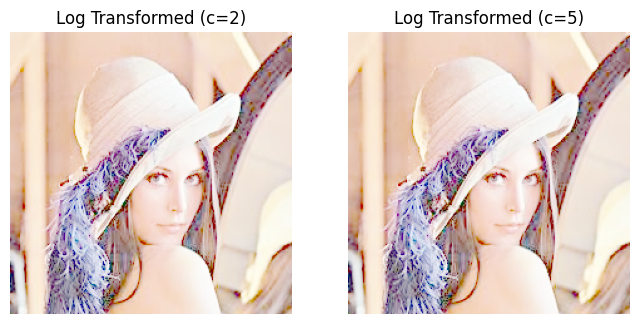

In [ ]:
def log_transform(image, c=1):
  imageFloat = np.float32(image)
  resultant = c * np.log(1 + imageFloat)
  resultant = cv2.normalize(resultant, None, 0, 255, cv2.NORM_MINMAX)
  resultant = np.uint8(resultant)
  return resultant


def plot_histogram(image, title):
  plt.hist(image.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
  plt.title(title)
  plt.xlim([0, 256])

# Question 1
print("Implement the log transformation function and apply it to an image with a narrow range of low gray-level values.")

image     = cv2.imread('fullColor.jpeg' , cv2.IMREAD_COLOR)
image     = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
logImage  = log_transform(image, c=1)
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Log Transformed Image')
plt.imshow(logImage)
plt.axis('off')
plt.show()

# Question 2
print("Analyze the effect of the log transformation on enhancing details in dark regions of an image.")

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plot_histogram(image, 'Original Image Histogram')
plt.subplot(1, 2, 2)
plot_histogram(logImage, 'Log Transformed Image Histogram')
plt.show()

# Question 3
print("Experiment with different values of the constant 'c' in the log transformation equation and observe the changes in output image.")

cValues = [0.5, 1, 2, 5]
plt.figure(figsize=(8, 5))
k = 0
for i, c in enumerate(cValues , 1):
  transformedImage = log_transform(image, c)
  k += 1
  if i > 2 :
    k = i - 2
  plt.subplot(1, 2, k )
  plt.title(f'Log Transformed (c={c})')
  plt.imshow(transformedImage)
  plt.axis('off')
  if i == 2:
    plt.figure(figsize=(8, 5))
plt.show()




Implement the power-law transformation function with different values of gamma.
Apply the power-law transformation to enhance images with different contrast characteristics.
Analyze the effect of gamma values on the image appearance, especially for values less than and greater than 1.


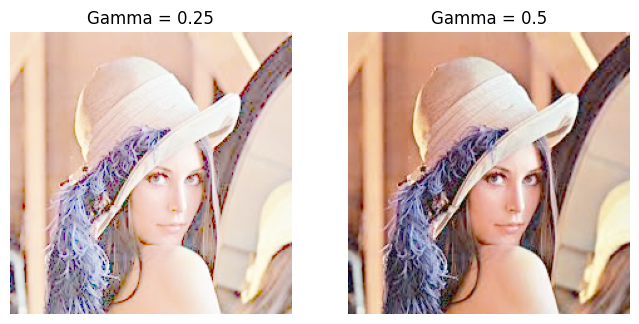

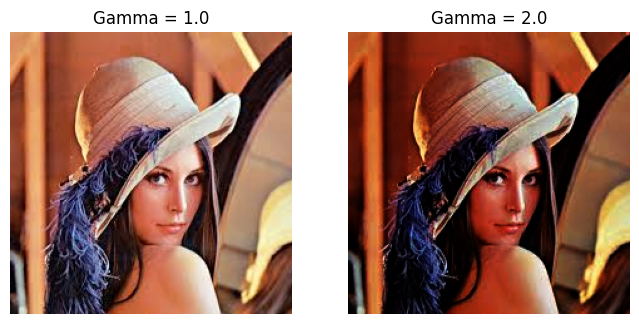

Experiment with different image types (e.g., medical, satellite, natural) to observe the impact of transformations.


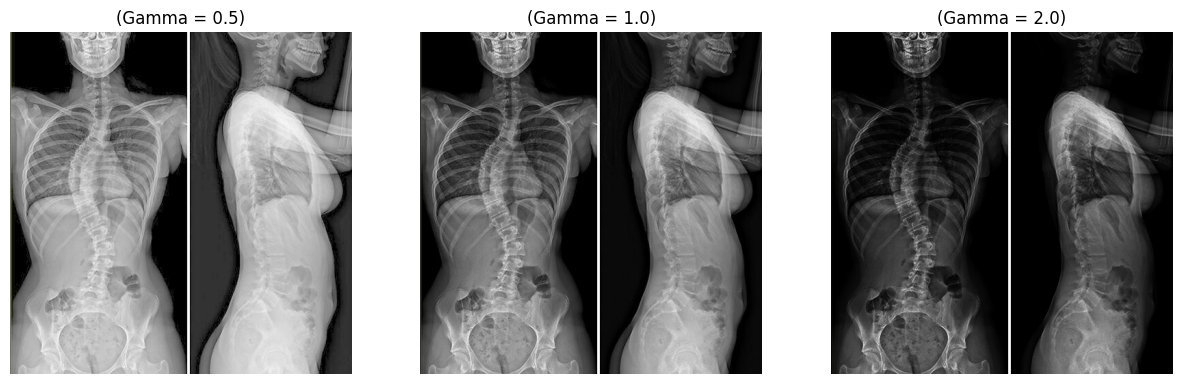

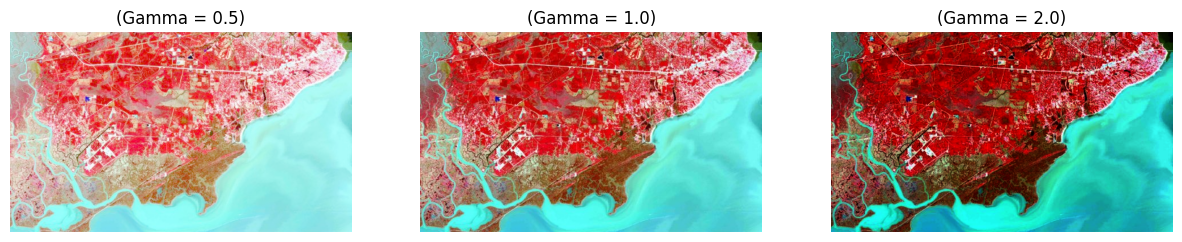

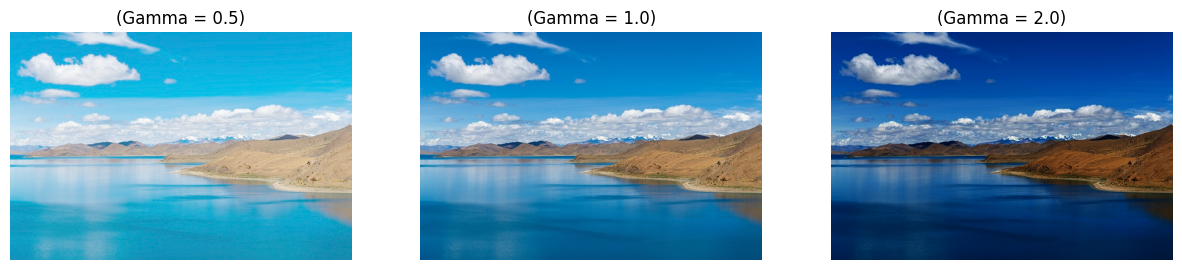

In [ ]:
# Question 1
print("Implement the power-law transformation function with different values of gamma.")

def power_law_transform(image, gamma=1.0, c=1.0):
    normalize = image / 255.0
    resultant = c * np.power(normalize, gamma)
    resultant = cv2.normalize(resultant, None, 0, 255, cv2.NORM_MINMAX)
    resultant = np.uint8(resultant)
    return resultant

# Question 2
print("Apply the power-law transformation to enhance images with different contrast characteristics.")
# Question 3
print("Analyze the effect of gamma values on the image appearance, especially for values less than and greater than 1.")

image   = cv2.imread('fullColor.jpeg', cv2.IMREAD_COLOR)
image   = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gamma   = [0.25 ,0.5, 1.0, 2.0]
plt.figure(figsize=(8, 5))
k       = 0
for i, gamma in enumerate(gamma, 1):
  k += 1
  if k > 2 :
    k = i - 2
    plt.figure(figsize=(8, 5))
  transformedImage = power_law_transform(image, gamma)
  plt.subplot(1, 2, k)
  plt.title(f'Gamma = {gamma}')
  plt.imshow(transformedImage)
  plt.axis('off')
plt.show()

# Question 4
print("Experiment with different image types (e.g., medical, satellite, natural) to observe the impact of transformations.")

medical     = cv2.imread('medicalmages.jpg', cv2.IMREAD_COLOR)
medical     = cv2.cvtColor(medical, cv2.COLOR_BGR2RGB)
satellite   = cv2.imread('satelliteImage.jpeg', cv2.IMREAD_COLOR)
satellite   = cv2.cvtColor(satellite, cv2.COLOR_BGR2RGB)
natural     = cv2.imread('natualImage.jpg', cv2.IMREAD_COLOR)
natural     = cv2.cvtColor(natural, cv2.COLOR_BGR2RGB)
gamma = [0.5, 1.0, 2.0]
plt.figure(figsize=(15, 5))
for i, gamma in enumerate(gamma, 1):
    transformedImage = power_law_transform(medical, gamma)
    plt.subplot(1, 3, i)
    plt.title(f'(Gamma = {gamma})')
    plt.imshow(transformedImage)
    plt.axis('off')
plt.show()
gamma = [0.5, 1.0, 2.0]
plt.figure(figsize=(15, 5))
for i, gamma in enumerate(gamma, 1):
    transformedImage = power_law_transform(satellite, gamma)
    plt.subplot(1, 3, i)
    plt.title(f'(Gamma = {gamma})')
    plt.imshow(transformedImage)
    plt.axis('off')
plt.show()
gamma = [0.5, 1.0, 2.0]
plt.figure(figsize=(15, 5))
for i, gamma in enumerate(gamma, 1):
    transformedImage = power_law_transform(natural, gamma)
    plt.subplot(1, 3, i)
    plt.title(f'(Gamma = {gamma})')
    plt.imshow(transformedImage)
    plt.axis('off')
plt.show()


Implement mean, median, and Gaussian filters. Apply them to images with different noise types (salt-and-pepper, Gaussian) and compare the results.


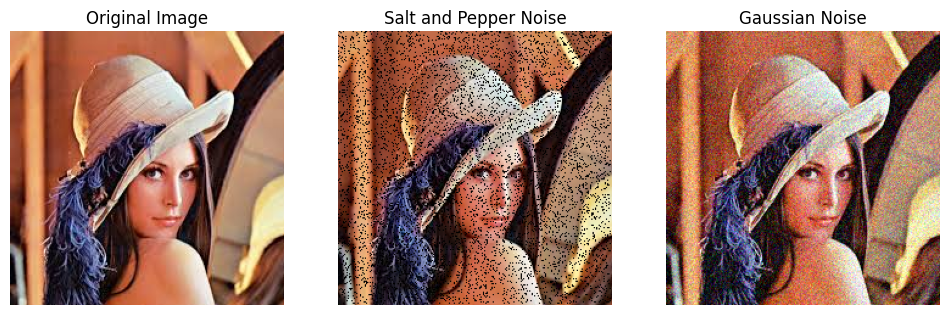

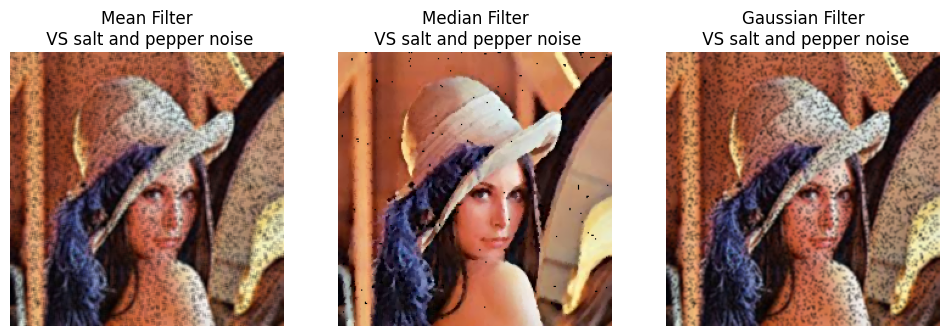

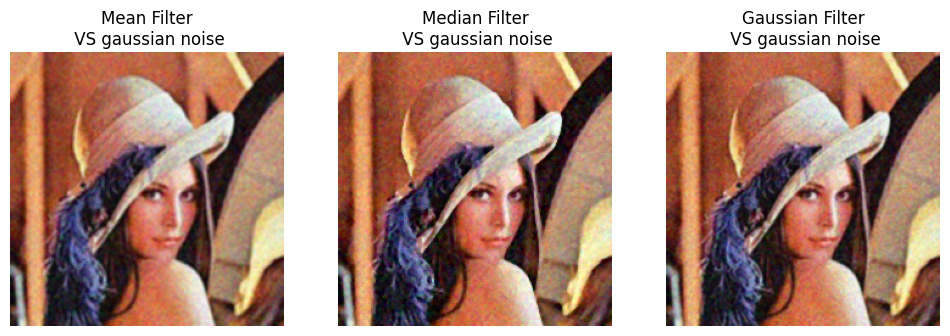

Design a custom filter for sharpening edges while preserving image details. Apply it to a natural image and evaluate its performance.


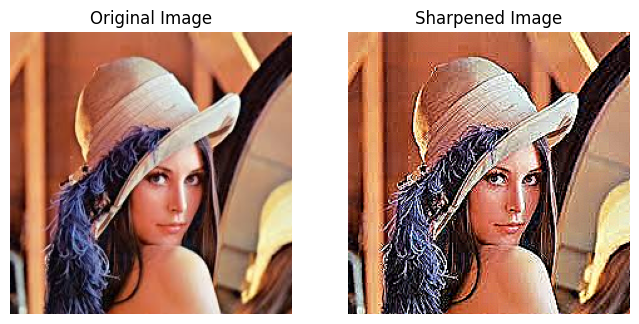

Experiment with different Laplacian operators (4-connected, 8-connected) and compare their edge detection capabilities.


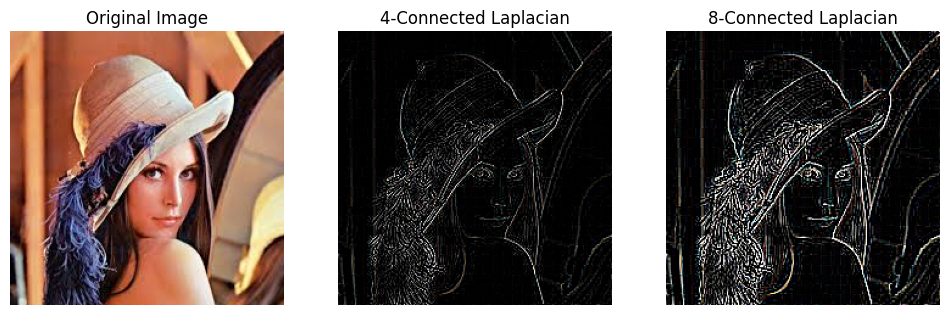

In [ ]:

def saltandpepper_noise(image, saltPepperRatio=0.01, amount = 0.05):
    resultant = np.copy(image)
    numSalt = np.ceil(amount * image.size * saltPepperRatio)
    coords = [np.random.randint(0, i - 1, int(numSalt)) for i in image.shape]
    resultant[coords[0], coords[1]] = 1
    numPepper = np.ceil(amount * image.size * (1.0 - saltPepperRatio))
    coords = [np.random.randint(0, i - 1, int(numPepper)) for i in image.shape]
    resultant[coords[0], coords[1]] = 0
    return resultant

def gaussian_noise(image, mean = 0, sigma = 25):
    noise = np.random.normal(mean, sigma, image.shape)
    resultant = np.clip(image + noise, 0, 255).astype(np.uint8)
    return resultant

def sharpening(image):
    kernel = np.array([[0, -1,  0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

def laplacian(image , threshold = 4):
    kernel = None
    if threshold <= 4:
      kernel = np.array([[0, 1,  0],
                        [1, -4, 1],
                        [0, 1,  0]])
    else :
      kernel = np.array([[1, 1,  1],
                         [1, -8, 1],
                         [1, 1,  1]])
    return cv2.filter2D(image, -1, kernel)

# Question 1
print("Implement mean, median, and Gaussian filters. Apply them to images with different noise types (salt-and-pepper, Gaussian) and compare the results.")

image           = cv2.imread('fullColor.jpeg', cv2.IMREAD_COLOR)
image           = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
saltyImage      = saltandpepper_noise(image)
guassianImage   = gaussian_noise(image)

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')
plt.subplot(2, 3, 2)
plt.title('Salt and Pepper Noise')
plt.imshow(saltyImage)
plt.axis('off')
plt.subplot(2, 3, 3)
plt.title('Gaussian Noise')
plt.imshow(guassianImage)
plt.axis('off')
plt.show()
meanFilter      = cv2.blur(saltyImage, (3, 3))
medianFilter    = cv2.medianBlur(saltyImage, 3)
gaussianFilter  = cv2.GaussianBlur(saltyImage, (3, 3), 0)
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.title('Mean Filter\n VS salt and pepper noise')
plt.imshow(meanFilter)
plt.axis('off')
plt.subplot(2, 3, 2)
plt.title('Median Filter\n VS salt and pepper noise')
plt.imshow(medianFilter)
plt.axis('off')
plt.subplot(2, 3, 3)
plt.title('Gaussian Filter\n VS salt and pepper noise')
plt.imshow(gaussianFilter)
plt.axis('off')
plt.show()
meanFilter      = cv2.blur(guassianImage, (3, 3))
medianFilter    = cv2.medianBlur(guassianImage, 3)
gaussianFilter  = cv2.GaussianBlur(guassianImage, (3, 3), 0)
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.title('Mean Filter\n VS gaussian noise')
plt.imshow(meanFilter)
plt.axis('off')
plt.subplot(2, 3, 2)
plt.title('Median Filter\n VS gaussian noise')
plt.imshow(medianFilter)
plt.axis('off')
plt.subplot(2, 3, 3)
plt.title('Gaussian Filter\n VS gaussian noise')
plt.imshow(gaussianFilter)
plt.axis('off')
plt.show()

# Question 2
print("Design a custom filter for sharpening edges while preserving image details. Apply it to a natural image and evaluate its performance.")

sharpenedImage  = sharpening(image)
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharpenedImage)
plt.axis('off')
plt.show()

# Question 3
print("Experiment with different Laplacian operators (4-connected, 8-connected) and compare their edge detection capabilities.")

laplacian4 = laplacian(image , threshold = 4)
laplacian8 = laplacian(image , threshold = 8)
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('4-Connected Laplacian')
plt.imshow(laplacian4)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('8-Connected Laplacian')
plt.imshow(laplacian8)
plt.axis('off')
plt.show()




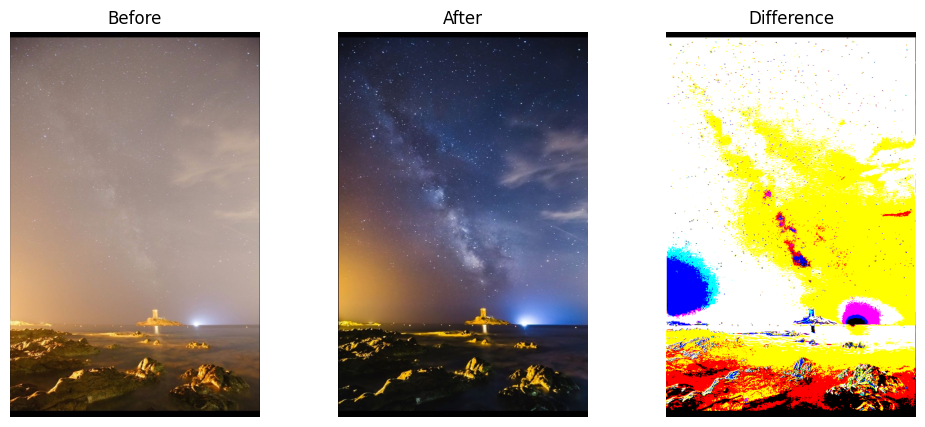

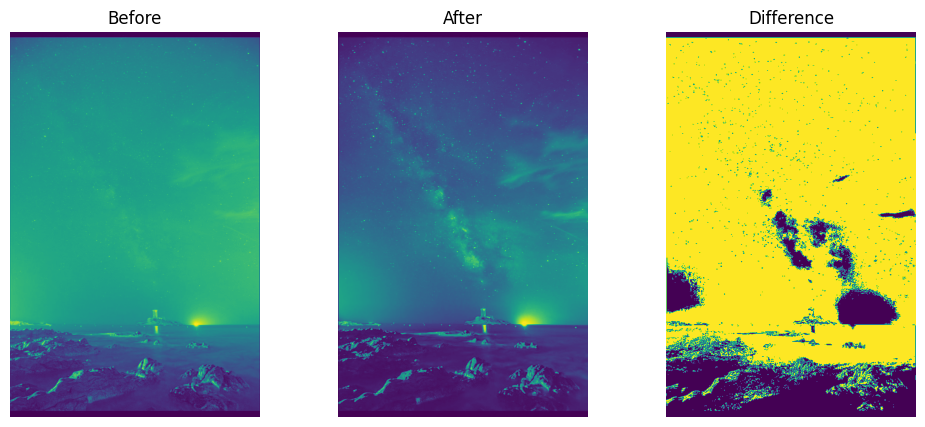

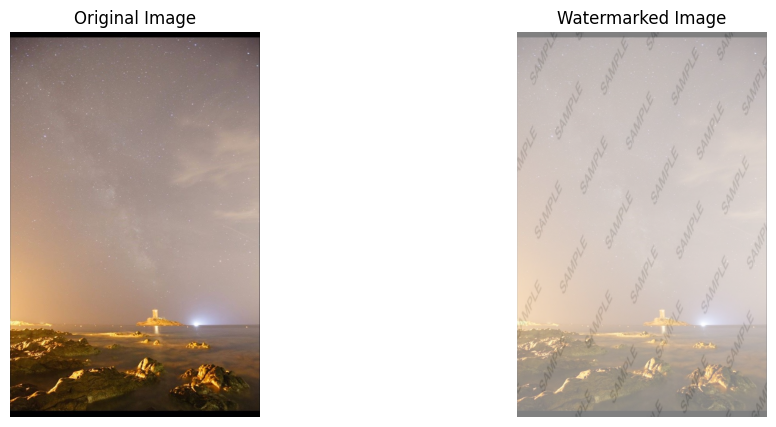

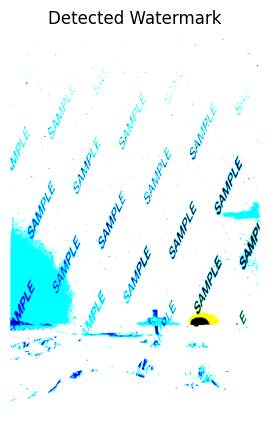

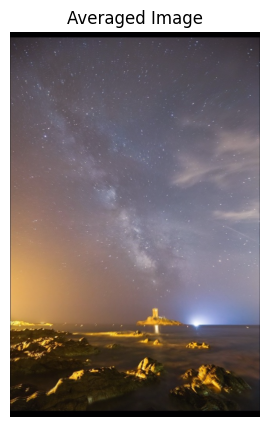

In [ ]:
def apply_watermark(image, watermark, alpha=0.5):
    watermark = cv2.resize(watermark, (image.shape[1], image.shape[0]))
    resultant = cv2.addWeighted(image, 1 - alpha, watermark, alpha, 0)
    return resultant

def average_images(imageList):
    size      = imageList[0].shape
    average   = np.zeros(size, dtype=np.float32)
    for img in imageList:
        average += img / len(imageList)
    return np.uint8(average)

# Question 1
print("")

before         = cv2.imread('before.jpg', cv2.IMREAD_COLOR)
before         = cv2.cvtColor(before, cv2.COLOR_BGR2RGB)
after          = cv2.imread('after.jpg', cv2.IMREAD_COLOR)
after          = cv2.cvtColor(after, cv2.COLOR_BGR2RGB)
difference     = cv2.absdiff(before, after)
_, thresh_diff = cv2.threshold(difference, 30, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title('Before')
plt.imshow(before)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('After')
plt.imshow(after)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Difference')
plt.imshow(thresh_diff, cmap='gray')
plt.axis('off')
plt.show()
before         = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after          = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)
difference     = cv2.absdiff(before, after)
_, thresh_diff = cv2.threshold(difference, 30, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title('Before')
plt.imshow(before)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('After')
plt.imshow(after)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Difference')
plt.imshow(thresh_diff)
plt.axis('off')
plt.show()

# Question 2
print("")

image            = cv2.imread('before.jpg', cv2.IMREAD_COLOR)
image            = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
watermark        = cv2.imread('watermark.jpg', cv2.IMREAD_COLOR)
watermark        = cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB)
watermarkedImage = apply_watermark(image, watermark)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Watermarked Image')
plt.imshow(watermarkedImage)
plt.axis('off')
plt.show()
detect = cv2.absdiff(watermarkedImage, image)
_, watermark = cv2.threshold(detect, 30, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(12, 5))
plt.title('Detected Watermark')
plt.imshow(watermark)
plt.axis('off')
plt.show()

# Question 3
print("")

before         = cv2.imread('before.jpg', cv2.IMREAD_COLOR)
before         = cv2.cvtColor(before, cv2.COLOR_BGR2RGB)
after          = cv2.imread('after.jpg', cv2.IMREAD_COLOR)
after          = cv2.cvtColor(after, cv2.COLOR_BGR2RGB)
images = [before, after]
average = average_images(images)
plt.figure(figsize=(12, 5))
plt.title('Averaged Image')
plt.imshow(average)
plt.axis('off')
plt.show()



